In [18]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Impoting the dataset
df=pd.read_csv('Credit_Card.csv')
df.head()

,Gender,Age,Debt,Married,Bank_Customer,Education_Level,Ethnicity,Years_Employed,Prior_Default,Employed,Credit_Score,Driver_License,Citizen,Zip_Code,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [6]:
# So there are values in some columns which are not clear, so converting the
#them in order to understand
# For Gender
df['Gender'].replace(to_replace= 'a' ,value='Female',inplace=True)
df['Gender'].replace(to_replace= 'b' ,value='Male',inplace=True)
# Married ...
df['Married'].replace(to_replace= 'u' ,value='Unmarried',inplace=True)
df['Married'].replace(to_replace= 'y' ,value='Married',inplace=True)
# BAnk Customer
df['Bank_Customer'].replace(to_replace= 'g' ,value='Government',inplace=True)
df['Bank_Customer'].replace(to_replace= 'p' ,value='Private',inplace=True)
# Prior default 
df['Prior_Default'].replace(to_replace= 't' ,value='Yes',inplace=True)
df['Prior_Default'].replace(to_replace= 'f' ,value='No',inplace=True)
# Employed..
df['Employed'].replace(to_replace= 't' ,value='Yes',inplace=True)
df['Employed'].replace(to_replace= 'f' ,value='No',inplace=True)
# Driver License..
df['Driver_License'].replace(to_replace= 't' ,value='Yes',inplace=True)
df['Driver_License'].replace(to_replace= 'f' ,value='No',inplace=True)
df.head(2)

,Gender,Age,Debt,Married,Bank_Customer,Education_Level,Ethnicity,Years_Employed,Prior_Default,Employed,Credit_Score,Driver_License,Citizen,Zip_Code,Income,Approved
0,Male,30.83,0.00,Unmarried,Government,w,v,1.25,Yes,Yes,1,No,g,202.0,0,1
1,Female,58.67,4.46,Unmarried,Government,q,h,3.04,Yes,Yes,6,No,g,43.0,560,1


In [4]:
# Rounding Of age variable
df['Age']=round(df['Age'])

- After reading this data we went through study of what goes behind the credit card approval, and it shows that Income,
- Credit Score and Credit History are most important factors in determining the whether to approve the credit card application reject the application

## Exploratory Data Analysis

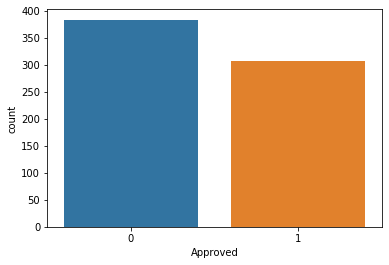

In [9]:
sns.countplot(x=df.Approved)

In [10]:
# So the above graph shows that we have balanced class

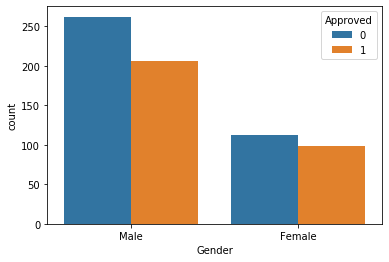

In [11]:
# Does Gender affect the decision of credit card approval
sns.countplot(x=df.Gender,hue=df.Approved)

- So the approval and unapproval rate is quite similar between male and female, So we can infer the gender does not play much role in deciding the decision of approval or unapproval

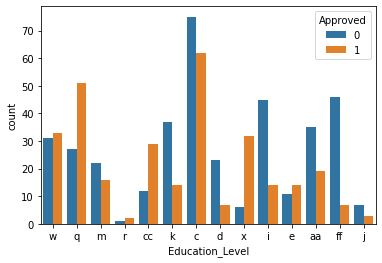

In [12]:
# Does Education Level affect the decision
sns.countplot(x=df.Education_Level,hue=df.Approved)

- By looking this graph ,it shows the education_level has pretty balanced class except the education x where the success 
  rate is pretty high,
- So we can infer a person with education x is more likely to get approval

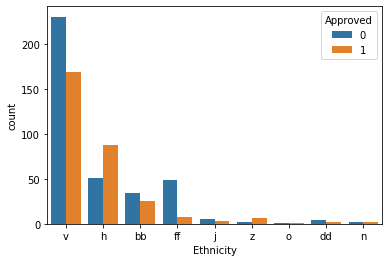

In [13]:
# Does ethnicity affect the decision?
sns.countplot(x=df.Ethnicity,hue=df.Approved)

- the difference between approval and unapproval is not noticeble in any group, So we can conclude that Ethnicity does not
  play a major role

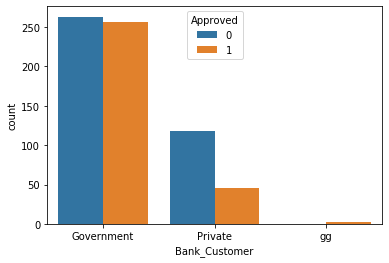

In [14]:
# Does Bank_Customer affect the decision?
sns.countplot(x=df.Bank_Customer,hue=df.Approved)

- So for a government employee the rate is quite similar,for a private customer the rate for unapproval is quite high
  and for the other it does not matter
- So we are not sure at this stage that we can drop this factor or not, 

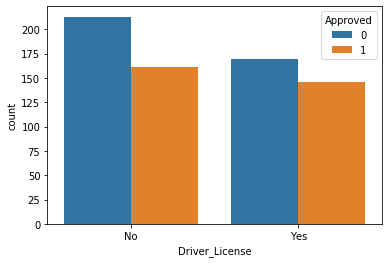

In [15]:
## Does Driver_License affect the decision?
sns.countplot(x=df.Driver_License,hue=df.Approved)

- It seems that having driver license or not having does not affect the decision, So we can drop this feature

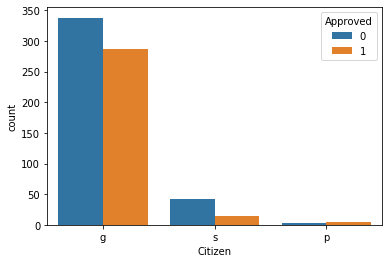

In [16]:
# Does being Citizen affect the decision?
sns.countplot(x=df.Citizen,hue=df.Approved)

- Citizen also do not show any noticeble pattern, So we can drop this feature

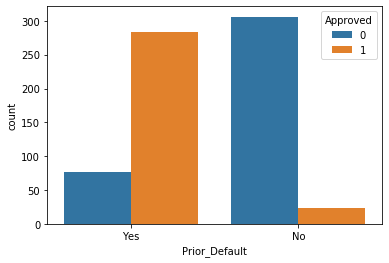

In [17]:
# Does Prior_Default affect the decision?
sns.countplot(x=df.Prior_Default,hue=df.Approved)

- So as we can see those who with prior default are more likely to get reject then those who are without prior default

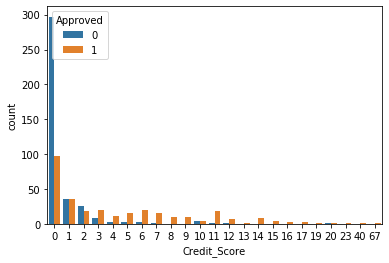

In [18]:
sns.countplot(x=df.Credit_Score,hue=df.Approved)

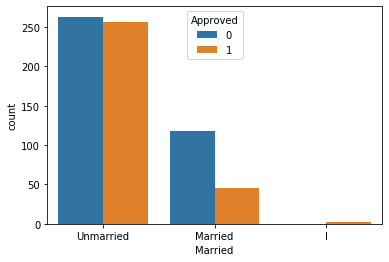

In [19]:
# Does Married affect the decision?
sns.countplot(x=df.Married,hue=df.Approved)

- It does not show any pattern, so we can not conclude that married people are more preffered than unmarried, So we can 
  drop this as well

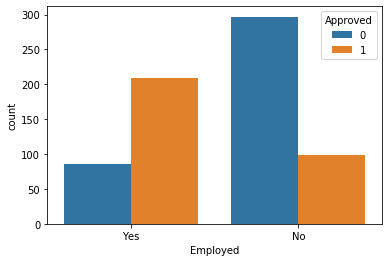

In [20]:
## Does Employment affect the decision?
sns.countplot(x=df.Employed,hue=df.Approved)

- Clearly we can see that employed people are more preferred

In [21]:
df.isnull().sum()


Gender             12
Age                12
Debt                0
Married             6
Bank_Customer       6
Education_Level     9
Ethnicity           9
Years_Employed      0
Prior_Default       0
Employed            0
Credit_Score        0
Driver_License      0
Citizen             0
Zip_Code           13
Income              0
Approved            0
dtype: int64

In [7]:
# Filling Missing Values
import statistics as st
df["Gender"].replace(to_replace=np.NaN,value=st.mode('Gender'),inplace = True)  
df["Age"].replace(to_replace=np.NaN,value=np.mean(df['Age']),inplace = True) 
df["Married"].replace(to_replace=np.NaN,value=st.mode(df['Married']),inplace = True) 
df["Education_Level"].replace(to_replace=np.NaN,value=st.mode(df['Education_Level']),inplace = True) 
df["Bank_Customer"].replace(to_replace=np.NaN,value=st.mode(df['Bank_Customer']),inplace = True) 

In [8]:
df.isnull().sum()

Gender              0
Age                 0
Debt                0
Married             0
Bank_Customer       0
Education_Level     0
Ethnicity           9
Years_Employed      0
Prior_Default       0
Employed            0
Credit_Score        0
Driver_License      0
Citizen             0
Zip_Code           13
Income              0
Approved            0
dtype: int64

In [9]:
# So after filling missing value we have missing values in column ethnicity and zip code
# But The bank should not be bother about the applicant's ethnicity and zip code because for a bank it does not matter
# from where the person comes 
# And throgh analysis we have seen that the Gender,married driver license all this column does not play much role

In [10]:
df=df.drop(['Ethnicity','Zip_Code','Citizen','Driver_License','Gender','Married'],axis=1)
df.head(2)

,Age,Debt,Bank_Customer,Education_Level,Years_Employed,Prior_Default,Employed,Credit_Score,Income,Approved
0,30.83,0.00,Government,w,1.25,Yes,Yes,1,0,1
1,58.67,4.46,Government,q,3.04,Yes,Yes,6,560,1


                     Age      Debt  Years_Employed  Credit_Score    Income  \
Age             1.000000  0.201316        0.392787      0.185575  0.018539   
Debt            0.201316  1.000000        0.298902      0.271207  0.123121   
Years_Employed  0.392787  0.298902        1.000000      0.322330  0.051345   
Credit_Score    0.185575  0.271207        0.322330      1.000000  0.063692   
Income          0.018539  0.123121        0.051345      0.063692  1.000000   
Approved        0.161627  0.206294        0.322475      0.406410  0.175657   

                Approved  
Age             0.161627  
Debt            0.206294  
Years_Employed  0.322475  
Credit_Score    0.406410  
Income          0.175657  
Approved        1.000000  


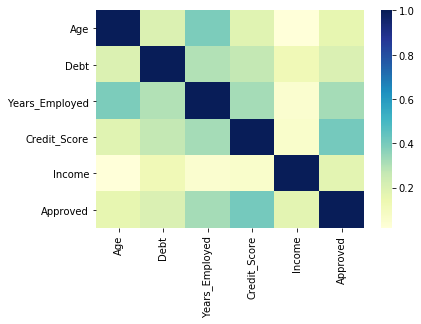

In [11]:
# SO Age,debt,years_employed,credit_score,income all thses factors have strong correlation with the response variable
hp=df.corr()
print(hp)
sns.heatmap(hp,cmap='YlGnBu')

In [12]:
# Converting categorical into quantitative
from sklearn.preprocessing import OneHotEncoder 
Prior_Default=pd.get_dummies(df.Prior_Default,drop_first=True)
Bank_Customer=pd.get_dummies(df.Bank_Customer,drop_first=True)
Employed=pd.get_dummies(df.Employed,drop_first=True)
df1=pd.concat([df,Prior_Default,Bank_Customer,Employed],axis=1)

In [13]:
df_1=df1.drop(['Prior_Default','Bank_Customer','Employed',],axis=1)

In [17]:
df_1.head(2)

,Age,Debt,Education_Level,Years_Employed,Credit_Score,Income,Approved,Yes,Private,gg,Yes
0,30.83,0.00,12,1.25,1,0,1,1,0,0,1
1,58.67,4.46,10,3.04,6,560,1,1,0,0,1


In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_1['Education_Level']= le.fit_transform(df_1['Education_Level']) 
df_1.head(4)

,Age,Debt,Education_Level,Years_Employed,Credit_Score,Income,Approved,Yes,Private,gg,Yes
0,30.83,0.00,12,1.25,1,0,1,1,0,0,1
1,58.67,4.46,10,3.04,6,560,1,1,0,0,1
2,24.50,0.50,10,1.50,0,824,1,1,0,0,0
3,27.83,1.54,12,3.75,5,3,1,1,0,0,1


In [20]:
#df_1.corr()

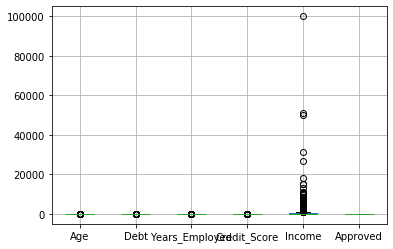

In [21]:
# So clearly from the boxplot the income column has outliers
df.boxplot()

In [22]:
# Before applying any model, checking whether all the features are numeric or not.
df_1.dtypes

Age                float64
Debt               float64
Education_Level      int64
Years_Employed     float64
Credit_Score         int64
Income               int64
Approved             int64
Yes                  uint8
Private              uint8
gg                   uint8
Yes                  uint8
dtype: object

In [23]:
# Shifting the response column at last 
df_2=df_1.pop('Approved')
df_1['Approved']=df_2

In [24]:
# Final Dataset
df_1.head(2)

,Age,Debt,Education_Level,Years_Employed,Credit_Score,Income,Yes,Private,gg,Yes,Approved
0,30.83,0.00,12,1.25,1,0,1,0,0,1,1
1,58.67,4.46,10,3.04,6,560,1,0,0,1,1


In [25]:
# Dividing the dataset into predictor variable and response variable
X=df_1.iloc[:,0 : -1]
y=df_1.iloc[:,-1 :]

In [26]:
#Splitting the dataset into train and test part
from sklearn.model_selection import train_test_split
seed = 10
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed) 

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 10, max_iter = 1000)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
pred = model.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test, pred)
print(con_mat)

[[96 17]
 [ 8 86]]


In [30]:
prob=model.predict_proba(X_test)

In [31]:
accuracy = (con_mat[0,0]+con_mat[1,1])/y_test.size
print("Accuracy:",accuracy)

Accuracy: 0.8792270531400966


In [32]:
precision = con_mat[0][0]/(con_mat[0][0] + con_mat[1][0])
print("Precision:",precision)

Precision: 0.9230769230769231


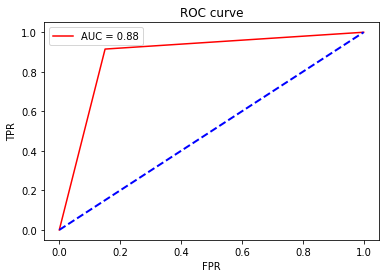

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, threshold = roc_curve(y_test, pred, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## K - NEAREST NEIGHBOUR

In [37]:
# Scaling the data 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train)
X_test_s=sc.fit_transform(X_test)

In [43]:
# Performing grid search cv to find the best tuning parameter
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
estimator =KNeighborsClassifier ()
param_grid = { 'n_neighbors':[6,8,7,9,10,11,12]}

In [44]:
grid = GridSearchCV(estimator, param_grid, n_jobs=-1)

In [45]:
grid.fit(X_train_s, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [6, 8, 7, 9, 10, 11, 12]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [46]:
# Finding out the best parameter
print(grid.best_params_)

{'n_neighbors': 7}


In [47]:
# Model on unscaled data
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [48]:
knn_pred=knn.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test, knn_pred)
print(con_mat)

[[97 16]
 [44 50]]


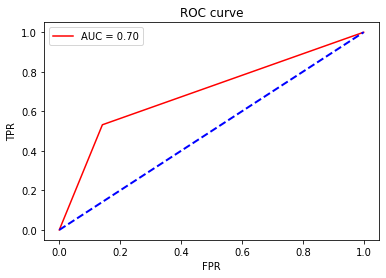

In [50]:
#Roc on testing dataset
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, threshold = roc_curve(y_test, knn_pred, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [69]:
#  Keeping small k value means increases variance ,knn is performing best with value between 10 and 15

## After Scaling the data

In [51]:
from sklearn.neighbors import KNeighborsClassifier 
knn_s = KNeighborsClassifier(n_neighbors=7)
knn_s.fit(X_train_s, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [52]:
knn_pred_s=knn_s.predict(X_test_s)

In [53]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test, knn_pred_s)
print(con_mat)

[[101  12]
 [ 15  79]]


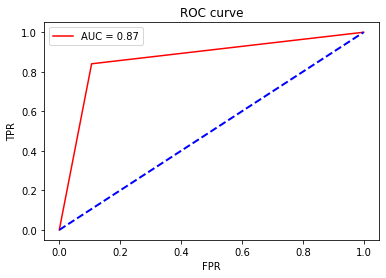

In [54]:
#Roc on testing dataset
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, threshold = roc_curve(y_test, knn_pred_s, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
# After scaling the data the performance of knn has increased

## SUPPORT VECTOR MACHINE

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
estimator =SVC ()
param_grid = { 'kernel':['linear'],
                'C'    :[2,3,4] }

In [56]:
grid = GridSearchCV(estimator, param_grid, n_jobs=-1)

In [57]:
grid.fit(X_train,y_train)     

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2, 3, 4], 'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [59]:
print(grid.best_params_)

{'C': 2, 'kernel': 'linear'}


## With C = 2

In [60]:
from sklearn.svm import SVC
clf_2= SVC(kernel='linear',C=2)
clf_2.fit(X_train,y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
pred_SVC_2=clf_2.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test, pred_SVC_2)
print(con_mat)

[[94 19]
 [ 4 90]]


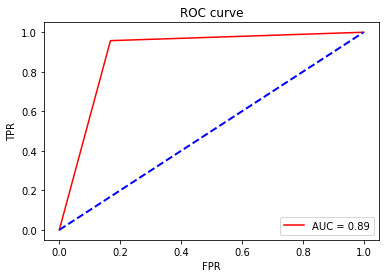

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, threshold = roc_curve(y_test, pred_SVC_2, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
# For kernel rbf

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
estimator =SVC ()
param_grid = { 'kernel':['rbf'],
                'gamma'    :[0.1,0.01,0.001,0.0001] }

In [61]:
grid = GridSearchCV(estimator, param_grid, n_jobs=-1)

In [62]:
grid.fit(X_train,y_train)

C:\Users\Sakshi Jain\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [63]:
print(grid.best_params_)

{'gamma': 0.001, 'kernel': 'rbf'}


In [64]:
from sklearn.svm import SVC
clf_3= SVC(kernel='rbf',gamma=0.001)
clf_3.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [65]:
pred_SVC_3=clf_3.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred_SVC_3)
print(cm)

[[95 18]
 [44 50]]


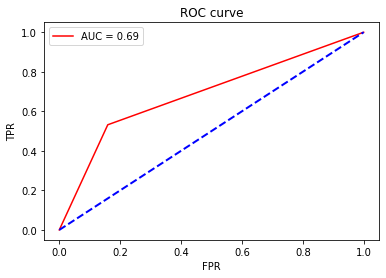

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, threshold = roc_curve(y_test, pred_SVC_3, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

-  So for support vector we see that it performs goos for linear kernal that to with c=4, with rbf it is not performing        good that means the decision boundary is probably linear.
 

## Classification Tree

In [332]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier()
param_grid = { 'criterion':['gini','entropy'],
               'random_state':[100,150,200,50],
                'max_depth'    :[1,2,3,4,5],
                  'min_samples_leaf':[1,2,3,4,5]}

In [333]:
grid = GridSearchCV(estimator, param_grid, n_jobs=-1)

In [334]:
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [335]:
print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4, 'random_state': 50}


In [69]:
#fitting the model
from sklearn.tree import DecisionTreeClassifier
clf_tree=DecisionTreeClassifier(criterion = "entropy", random_state = 50,max_depth=4, min_samples_leaf=4)
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=50, splitter='best')

In [72]:
pred_tree=clf_tree.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred_tree)
print(cm)

[[99 14]
 [24 70]]


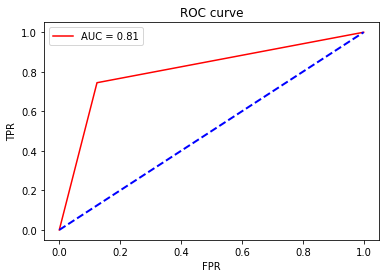

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, threshold = roc_curve(y_test, pred_tree, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
pred_rf=rf.predict(X_test)

In [77]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred_rf)
print(cm)

[[103  10]
 [ 19  75]]


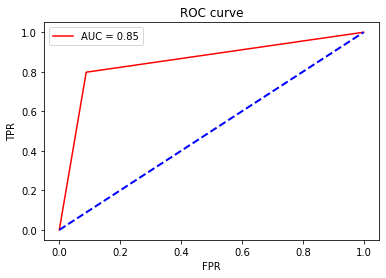

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, threshold = roc_curve(y_test, pred_rf, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## Boosting

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
estimator = AdaBoostClassifier()
param_grid = { 'n_estimators':[100,200,300],
               'learning_rate':[0.001,0.01,0.1,1]}

In [80]:
grid = GridSearchCV(estimator, param_grid, n_jobs=-1)

In [81]:
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [100, 200, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [82]:
print(grid.best_params_)

{'learning_rate': 0.1, 'n_estimators': 100}


In [83]:
from sklearn.ensemble import AdaBoostClassifier
ad_boost=AdaBoostClassifier(n_estimators=100,learning_rate=0.1)
ad_boost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=None)

In [84]:
pred_boost=ad_boost.predict(X_test)

In [85]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test, pred_boost)
print(con_mat)

[[98 15]
 [12 82]]


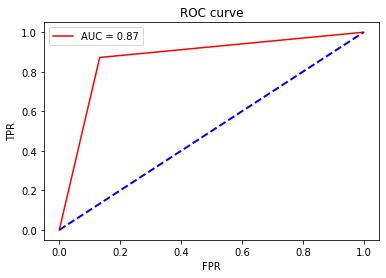

In [86]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, threshold = roc_curve(y_test, pred_boost, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [290]:
# We have applied almost all techniques the best results are getting from those techniques which perform good when the
# boundary is linear
# In this case probably the boundary is linear that's why svm with rbf kernal is not performing good